In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/Training.csv")

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.shape

(4920, 133)

In [5]:
len(df['prognosis'].unique())

41

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
X = df.drop("prognosis",axis = 1)#to drop row wise u hv to give 0 and for column wise u have to give 1
y = df['prognosis']

In [8]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 20)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [47]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#creating a dictionary to store a models
models = {
    "SVC":SVC(kernel='linear'),#draw a hyperplane between two classes
    "RandomForest":RandomForestClassifier(n_estimators=100,random_state = 42),
    "GradientBoosting":GradientBoostingClassifier(n_estimators=100,random_state = 42),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB":MultinomialNB()
}

for model_name, model in models.items():
    #train model
    model.fit(X_train,y_train)
    
    #model test
    pred = model.predict(X_test)

    #cal accuracy
    acc = accuracy_score(y_test,pred)

    #cal confusion matrix
    cm = confusion_matrix(y_test,pred)#this will be an array

    print(f"{model_name} accuracy : {acc}")
    print(f"{model_name} confusion matrix :")
    print(np.array2string(cm,separator=', '))#converting to string

SVC accuracy : 1.0
SVC confusion matrix :
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
RandomForest accuracy : 1.0
RandomForest confusion matrix :
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
GradientBoosting accuracy : 1.0
GradientBoosting confusion matrix :
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
KNeighbors accuracy : 1.0
KNeighbors confusion matrix :
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, 

In [12]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

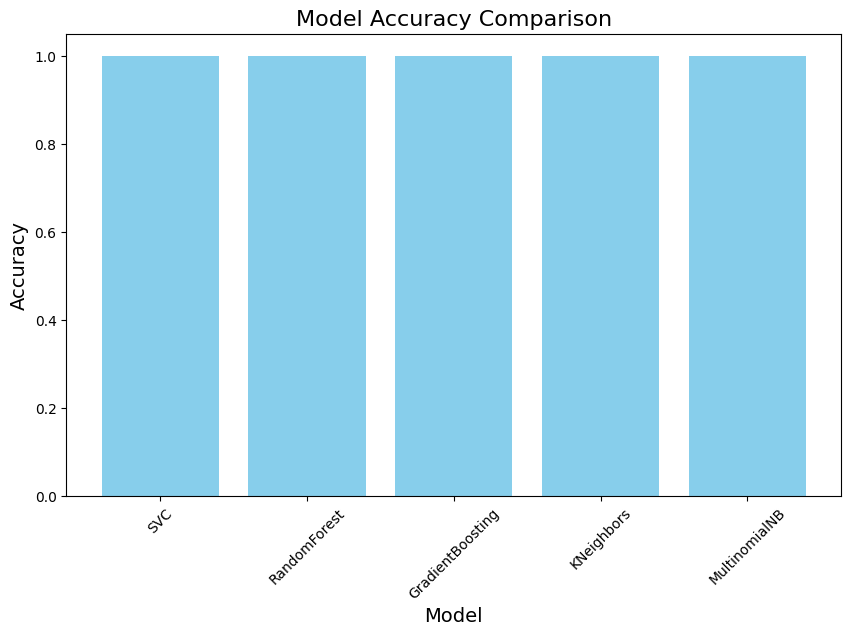

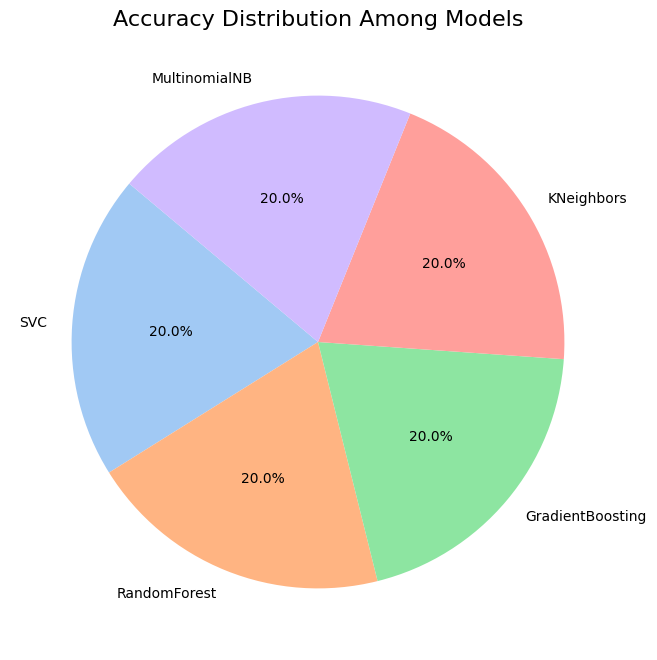

In [22]:
# Bar Graph for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Accuracy Distribution
plt.figure(figsize=(8, 8))
plt.pie(model_accuracies.values(), labels=model_accuracies.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Accuracy Distribution Among Models', fontsize=16)
plt.show()


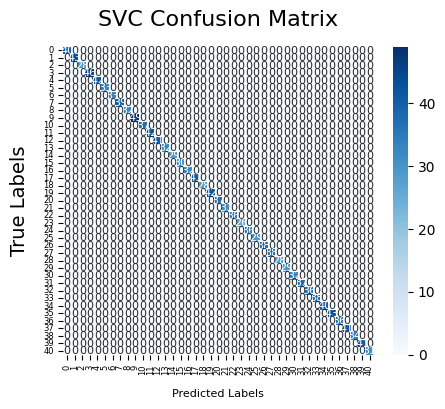

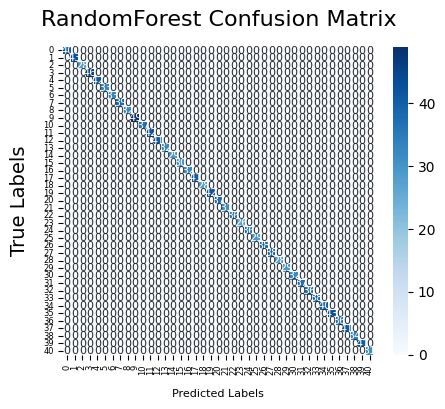

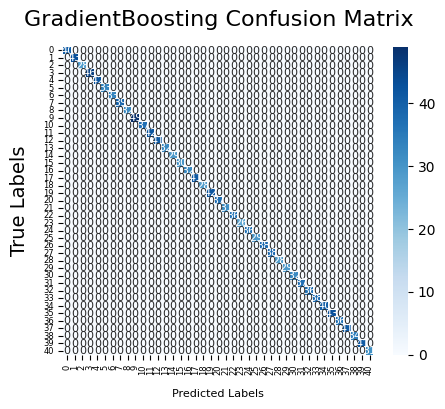

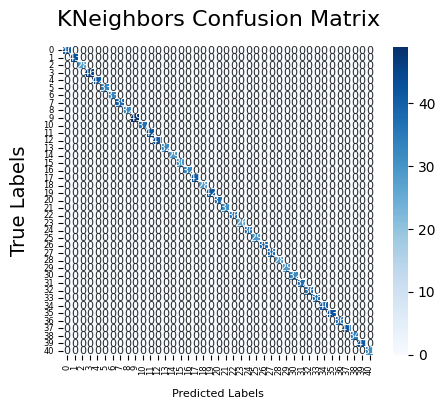

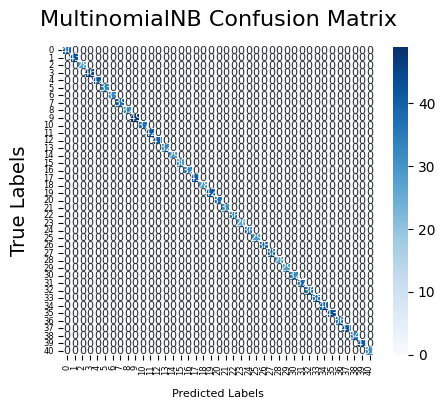

In [40]:
for model_name, cm in confusion_matrices.items():
    # Create heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                annot_kws={"size": 8},  # Larger font size for annotations
                xticklabels=np.arange(cm.shape[0]),  # Numeric labels
                yticklabels=np.arange(cm.shape[1]))
    
    # Titles and labels
    plt.title(f'{model_name} Confusion Matrix', fontsize=16, pad=15)
    plt.xlabel('Predicted Labels', fontsize=8, labelpad=10)
    plt.ylabel('True Labels', fontsize=14, labelpad=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    
    # Display the heatmap
    plt.show()


In [14]:
#save model
import pickle
pickle.dump(svc,open("Models/svc.pkl",'wb'))

In [15]:
#load model
svc = pickle.load(open("Models/svc.pkl",'rb'))

In [16]:
#test 1
print("Predicted label : ",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual label : ",y_test[0])

Predicted label :  [40]
Actual label :  40


c:\users\nehar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [17]:
#test 1
print("Predicted label : ",svc.predict(X_test.iloc[10].values.reshape(1,-1)))
print("Actual label : ",y_test[10])

Predicted label :  [20]
Actual label :  20


c:\users\nehar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [18]:
#load database

sys_des = pd.read_csv("Datasets/symtoms_df.csv")
precautions = pd.read_csv("Datasets/precautions_df.csv")
workout = pd.read_csv("Datasets/workout_df.csv")
description = pd.read_csv("Datasets/description.csv")
medications = pd.read_csv("Datasets/medications.csv")
diets = pd.read_csv("Datasets/diets.csv")

In [19]:
#helper function
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    prec = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    prec = [col for col in prec.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    diet = diets[diets['Disease'] == dis]['Diet']
    diet = [die for die in diet.values]

    work = workout[workout['disease'] == dis] ['workout']


    return desc,prec,med,diet,work

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]


In [20]:
#test 1

symptoms = input("Enter your symptoms..........")
user_symptoms = [s.strip() for s in symptoms.split(',') ]
user_symptoms = [sym.strip("[]' '") for sym in user_symptoms ]
predicted_disease = get_predicted_value(user_symptoms)
desc,prec,med,diet,work = helper(predicted_disease)

#results print
print("************************** Predicted Disease ***************************")
print(predicted_disease)
print("************************** Description ***************************")
print(desc)
print("************************** Precautions ***************************")
i= 1
for p in prec[0]:
    print(i," : ",p)
    i += 1
print("************************** Workout ***************************")
i= 1
for p in work:
    print(i," : ",p)
    i += 1
print("************************** Medicine ***************************")
i= 1
for p in med:
    print(i," : ",p)
    i += 1
print("************************** Diet ***************************")
i= 1
for p in diet:
    print(i," : ",p)
    i += 1

Enter your symptoms.......... itching,skin_rash


************************** Predicted Disease ***************************
Fungal infection
************************** Description ***************************
Fungal infection is a common skin condition caused by fungi.
************************** Precautions ***************************
1  :  bath twice
2  :  use detol or neem in bathing water
3  :  keep infected area dry
4  :  use clean cloths
************************** Workout ***************************
1  :  Avoid sugary foods
2  :  Consume probiotics
3  :  Increase intake of garlic
4  :  Include yogurt in diet
5  :  Limit processed foods
6  :  Stay hydrated
7  :  Consume green tea
8  :  Eat foods rich in zinc
9  :  Include turmeric in diet
10  :  Eat fruits and vegetables
************************** Medicine ***************************
1  :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
************************** Diet ***************************
1  :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Co

c:\users\nehar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [21]:
import sklearn
print(sklearn.__version__)

1.5.2
